In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [8]:
pd.options.display.max_columns = 200

In [2]:
train = pd.read_csv('train.csv')

In [29]:
train = train.fillna(0)

In [9]:
train.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,...,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11,NaN,NaN,0.49,5,1.842984,27.053679,1,NaN,NaN,-0.925463,2,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,...,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.965681,1564384.957101
1,2,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13,NaN,-0.409923,0.71,9,1.577586,9.546915,1,-0.949891,0.917958,-0.897067,9,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,-0.000252,-0.000230,2.122038e-04,-0.000503,-0.000014,-0.000008,0.000241,0.000017,-0.000254,0.000250,-0.000250,-0.000003,-0.000254,-0.000006,-0.001000,0.000244,-5.060288e-04,0.000490,-0.000503

In [21]:
def evaluate(pred, truth, weights):
    abs_diff = np.abs(pred - truth)
    big_sum = (abs_diff[:, 0:-2] * weights[:, [0]]).sum() + (abs_diff[:, -2:] * weights[:, [1]]).sum()
    return big_sum / abs_diff.shape[0] / abs_diff.shape[1]

In [22]:
lr = LinearRegression()

In [27]:
def get_validate_score(x, y, random_state=43):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.33, random_state=random_state)
    lr.fit(x_train, y_train[:, :-2])
    pred_train = lr.predict(x_train)
    pred_valid = lr.predict(x_valid)
    return evaluate(pred_train, y_train[:, :-2], y_train[:, -2:]), evaluate(pred_valid, y_valid[:, :-2], y_valid[:, -2:])

In [35]:
insample_err = []
outsample_err = []
for rm_id in range(146):
    col_ids = list(range(146))
    col_ids.remove(rm_id)
    print(rm_id)
    errors = get_validate_score(
        train.iloc[:, col_ids].values,
        train.loc[:, 'Ret_121':'Weight_Daily'].values)
    insample_err.append(errors[0])
    outsample_err.append(errors[1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145


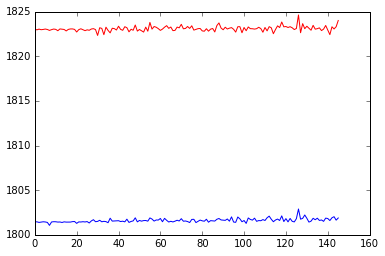

In [39]:
plt.figure()
plt.plot(insample_err)
plt.plot(outsample_err, color='r')
# looks like neither one is much more important than the others

In [40]:
# now train on all samples
lr.fit(train.iloc[:, :146], train.loc[:, 'Ret_121':'Ret_PlusTwo'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [43]:
pred = lr.predict(test.iloc[:, 1:].fillna(0))

In [44]:
lr_to_csv = pd.DataFrame({sample.columns[0]:sample.iloc[:, 0], sample.columns[1]:pred.flatten()})

In [45]:
lr_to_csv.head()

,Id,Predicted
0,1_1,-0.205064
1,1_2,0.056217
2,1_3,0.096444
3,1_4,0.112370
4,1_5,-0.141679


In [46]:
lr_to_csv.to_csv('linear_regression.csv', index=False)